## Monte Carlo Exercise 1 
# Lorenzo Speri and Carlo Tombolini


the feature variable $X \in [0,1]$ is a real-valued and 1-dimensional, and the response $Y \in \{0, 1\}$ 
$$p(Y=0) = p(Y=1) = 1/2$$
$$p(X = x| Y = 0) = 2 - 2x$$
$$p(X = x| Y = 1) = 2x$$

Applying the Bayes formula
$$
p(Y|X) = \frac{p(X|Y) p(Y)}{p(X)}
$$
to our likelihoods, we obtain the feature density
$$p(X) = p(X|Y=0)p(Y=0) + p(X|Y=1)p(Y=1) = 1$$
So the posteriors are
\begin{eqnarray}
p(Y=0|X) = 1-x\\
p(Y=1|X) = x \\
\end{eqnarray}

In order to find the data set we apply the following algorithm:
<br>
sample $Y \in \{0,1\}$  
<br>
find the features $x$ using the inverse transform sampling:
$$CP(x|Y) = \int_0 ^{x'} P(X=x'|Y) dx'$$
where CP is the cumulative distribution. 
If $Y = 0$
$$
CP(x|Y=0)= \int_0 ^{x'} 2-2x' dx' = 2(x-\frac{x^2}{2})
$$
If $Y = 1$
$$
CP(x|Y=1)= \int_0 ^{x'} 2x' dx' = x^2)\\
$$
So we sample $u$ from a uniform distribution $[0,1)$ in order to obtain $x$ according to the different cases $Y =0$ or $1$
$$
u \equiv CP(x|Y)
$$
For $Y = 0$ the correspondent features will be $x = 1- \sqrt{1-u}$
<br>
For $Y=1$ the correspondent features will be $x=\sqrt{u}$


In [235]:
# importing the libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
# define the size of the data set
N = 1000

In [236]:
y = np.random.randint(2, size=N)
#print(y)

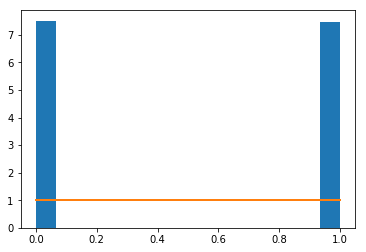

In [237]:
# plot check
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [238]:
# generate uniform distribution of u
#u = np.random.uniform(0,1,1)
# define x
x = np.array([])
# array benchmark of p(x|y=0)
x_y0 = np.array([])
# array benchmark of p(x|y=1)
x_y1 = np.array([])

# get the features x
for k in range(N):
    u = np.random.uniform(0,1,1)
    if y[k]==0:
        #all_primes = np.append(all_primes,[n])
        x = np.append(x,[1 - np.sqrt(1-u)]) 
        x_y0 = np.append(x_y0,[1 - np.sqrt(1-u)]) 
    else:
        x = np.append(x,[np.sqrt(u)])
        x_y1 = np.append(x_y1,[np.sqrt(u)])


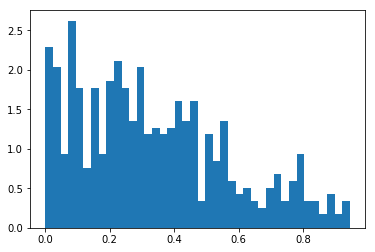

In [242]:
# check the distribution of p(x|y=0)
# plot check
count, bins, ignored = plt.hist(x_y0, 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

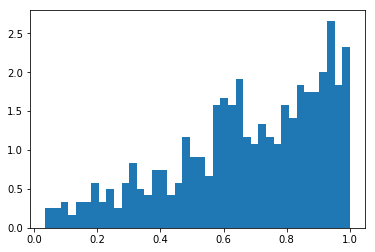

In [240]:
# check the distribution of p(x|y=1)
# plot check
count, bins, ignored = plt.hist(x_y1, 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

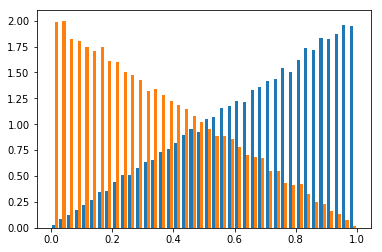

In [10]:
# plot check
count, bins, ignored = plt.hist([x_y1,x_y0], 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [243]:
# function definition
def create_data(N):
    y = np.random.randint(2, size=N)
    x = np.array([])
    # array benchmark of p(x|y=0)
    #x_y0 = np.array([])
    # array benchmark of p(x|y=1)
    #x_y1 = np.array([])
    # get the features x
    for k in range(N):
        u = np.random.uniform(0,1,1)
        if y[k]==0:
           #all_primes = np.append(all_primes,[n])
            x = np.append(x,[1 - np.sqrt(1-u)]) 
            #x_y0 = np.append(x_y0,[1 - np.sqrt(1-u)]) 
        else:
            x = np.append(x,[np.sqrt(u)])
            #x_y1 = np.append(x_y1,[np.sqrt(u)])
    return x, y #, x_y0, x_y1



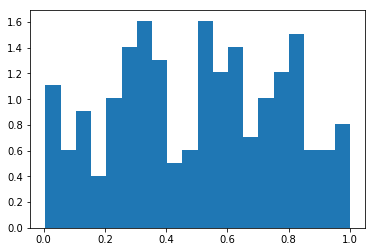

In [245]:
# function check
N=200
x, y = create_data(N)
# check the distribution of p(x|y=0)
# plot check
count, bins, ignored = plt.hist(x, 20, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

Exercise 1.3

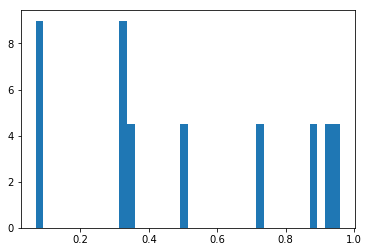

[1 0 1 0 1 0 1 0 1 0]


In [509]:
# function that always gives the  correct data set
def rejection_sampling_data(N):
    x, y = create_data(N)
    for k in range(N-1):
        while y[k]==y[k+1]:
            a, b = create_data(1)
            x[k+1] = a
            y[k+1] = b
    return x, y
# check
x, y = rejection_sampling_data(10)
# plot check
count, bins, ignored = plt.hist(x, 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()
print(y)

In [484]:
# rule A
def f_A(x):
    # predictions
    f = np.array([])
    # Define the bisector
    t = np.sum(x)/len(x)
    for k in range(len(x)):
        if x[k] < t:
            f = np.append(f,[0])
        else:
            f = np.append(f,[1])
    return f

# rule B
def f_B(x):
    # predictions
    f = np.array([])
    # Define the bisector
    t = np.sum(x)/len(x)
    for k in range(len(x)):
        if x[k] < t:
            f = np.append(f,[1])
        else:
            f = np.append(f,[0])
    return f



In [516]:
# test functions
print(f_A(x)-y)
print(f_A(x))
print(y)

[ 0.  1.  0.  0. -1.  0.  0.  0. -1.  0.]
[1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
[1 0 1 0 1 0 1 0 1 0]


In [526]:
# Check if the prediction is correct
def error_function(y, f):
    err=0
    diff = y - f
    for k in range(len(y)):
        if int(abs(diff[k])) == 0:
            err += 0
        else:
            err += 1
    return err
#test
print(error_function(y,f_A(x)))
print(y)

0
[1 0]


In [787]:
## error rate of 100 training sets
# size of the training set
N = 2
# number of training set
n_TS = 10000
#total error
tot_error = 0
error_A =0
error_B = 0
count =0
x, y = rejection_sampling_data(N)
for k in range(n_TS):
    x, y = rejection_sampling_data(N)
    f=0
    #print(x)
    #print(y)
    for j in range(N-1):
        if x[j]<x[j+1]:
            f=f_A(x)
        #print(f_A(x))
        else:
            f=f_B(x)
            #print(f_B(x))
    tot_error += error_function(y,f)
    
print(tot_error/(N*n_TS))

0.4972
